# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.11.0-lambda.new.281.334.340.351.356.fixing.339.refactor.354'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


195

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See', 'Tanzania'],
 3: ['Saint Lucia', 'Fiji'],
 4: ['Seychelles', 'Grenada', 'Dominica'],
 5: ['Equatorial Guinea', 'Saint Vincent and the Grenadines', 'Brunei',
     'Antigua and Barbuda'],
 6: ['Cambodia'],
 7: ['Northern Mariana Islands', 'Liechtenstein', 'Gambia', 'Mauritius',
     'Sao Tome and Principe', 'Kazakhstan'],
 8: ['Republic of the Congo', 'South Africa', 'Lesotho', 'Belize',
     'Trinidad and Tobago', 'Burundi', 'Barbados', 'Malawi', 'Papua New Guinea',
     'Namibia', 'Madagascar', 'Kyrgyzstan', 'Virgin Islands, U.S.'],
 9: ['Ghana', 'Botswana', 'Singapore', 'Swaziland', "Cote d'Ivoire", 'Bahamas',
     'Vietnam', 'Bhutan', 'Rwanda', 'Chile', 'Mongolia', 'Venezuela',
     'Honduras', 'Djibouti', 'Egypt', 'Bolivia', 'Suriname', 'Benin', 'Liberia',
     'Eritrea', 'Ethiopia', 'Myanmar', 'Zimbabwe', 'Oman', 'Bermuda', 'Zambia',
     'Senegal', 'Monaco', 'Australia', 'Uzbekistan'],
 10: ['Saudi Arabia', 'Libya', 'Kenya', 'Nigeria', 'Colombia', 'Maldives',
    

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

1

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Belgium']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Belgium 0th    Past  10Mar2020  26Mar2020    11433256
        1st    Past  27Mar2020  07Apr2020    11433256
        2nd    Past  08Apr2020  19Apr2020    11433256
        3rd    Past  20Apr2020  13May2020    11433256
        4th    Past  14May2020  26Jul2020    11433256
        5th    Past  27Jul2020  16Aug2020    11433256
        6th    Past  17Aug2020  09Sep2020    11433256
        7th    Past  10Sep2020  20Sep2020    11433256
        8th    Past  21Sep2020  29Sep2020    11433256
        9th    Past  30Sep2020  06Oct2020    11433256
        10th   Past  07Oct2020  12Oct2020    11433256
        11th   Past  13Oct2020  22Oct2020    11433256
        12th   Past  23Oct2020  01Nov2020    11433256
        13th   Past  02Nov2020  07Nov2020    11433256
        14th   Past  08Nov2020  14Nov2020    11433256
        15th   Past  15Nov2020  24Nov2020    11433256

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	BEL, 12th phase (23Oct2020 - 01Nov2020): finished  365 trials in 0 min 10 sec

	BEL,  6th phase (17Aug2020 - 09Sep2020): finished  357 trials in 0 min 10 sec

	BEL,  7th phase (10Sep2020 - 20Sep2020): finished  362 trials in 0 min 10 sec

	BEL, 15th phase (15Nov2020 - 24Nov2020): finished  401 trials in 0 min 10 sec

	BEL, 11th phase (13Oct2020 - 22Oct2020): finished  342 trials in 0 min 10 sec

	BEL, 14th phase (08Nov2020 - 14Nov2020): finished  344 trials in 0 min 10 sec

	BEL,  1st phase (27Mar2020 - 07Apr2020): finished  332 trials in 0 min 10 sec

	BEL,  8th phase (21Sep2020 - 29Sep2020): finished  338 trials in 0 min 10 sec

	BEL,  0th phase (10Mar2020 - 26Mar2020): finished  361 trials in 0 min 10 sec

	BEL, 10th phase (07Oct2020 - 12Oct2020): finished  365 trials in 0 min 10 sec

	BEL, 13th phase (02Nov2020 - 07Nov2020): finished  363 trials in 0 min 10 sec

	BEL,  9th phase (30Sep2020 - 06Oct2020): finished  365 trials in 0 min 10 sec

	BEL,  5th phase (27Jul2020 - 16Aug2020): finished  361 trials in 0 min 10 sec

	BEL,  4th phase (14May2020 - 26Jul2020): finished  342 trials in 0 min 10 sec

	BEL,  3rd phase (20Apr2020 - 13May2020): finished  358 trials in 0 min 10 sec

	BEL,  2nd phase (08Apr2020 - 19Apr2020): finished  366 trials in 0 min 10 sec

Completed optimization. Total: 0 min 43 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt     theta  \
Country Phase                                                                   
Belgium 0th    Past  10Mar2020  26Mar2020    11433256  SIR-F  22.34  0.001047   
        1st    Past  27Mar2020  07Apr2020    11433256  SIR-F   3.95  0.127531   
        2nd    Past  08Apr2020  19Apr2020    11433256  SIR-F   2.99  0.192670   
        3rd    Past  20Apr2020  13May2020    11433256  SIR-F   1.30  0.165302   
        4th    Past  14May2020  26Jul2020    11433256  SIR-F   2.75  0.164954   
        5th    Past  27Jul2020  16Aug2020    11433256  SIR-F  10.04  0.220974   
        6th    Past  17Aug2020  09Sep2020    11433256  SIR-F  11.06  0.354036   
        7th    Past  10Sep2020  20Sep2020    11433256  SIR-F  24.95  0.000473   
        8th    Past  21Sep2020  29Sep2020    11433256  SIR-F  31.16  0.002772   
        9th    Past  30Sep2020  06Oct2020    11433256  SIR-F  42.03  0.001238   
        10th   Past  07Oct2020  12Oct2020    11433256  SIR-F  54.78  0.004726   
        11th   Past  13Oct2020  22Oct2020    11433256  SIR-F  52.98  0.000900   
        12th   Past  23Oct2020  01Nov2020    11433256  SIR-F  26.85  0.002300   
        13th   Past  02Nov2020  07Nov2020    11433256  SIR-F   9.07  0.002348   
        14th   Past  08Nov2020  14Nov2020    11433256  SIR-F  12.31  0.000445   
        15th   Past  15Nov2020  24Nov2020    11433256  SIR-F   3.22  0.427654   

                  kappa       rho     sigma  tau 1/beta [day] 1/gamma [day]  \
Country Phase                                                                 
Belgium 0th    0.001434  0.046094  0.000627  360            5           398   
        1st    0.000531  0.023226  0.004594  360           10            54   
        2nd    0.000071  0.014986  0.003970  360           16            62   
        3rd    0.000482  0.003590  0.001816  360           69           137   
        4th    0.000048  0.001127  0.000293  360          221           851   
        5th    0.000098  0.003607  0.000182  360           69          1374   
        6th    0.000005  0.002507  0.000142  360           99          1762   
        7th    0.000098  0.004857  0.000097  360           51          2589   
        8th    0.000002  0.004940  0.000156  360           50          1600   
        9th    0.000002  0.007805  0.000184  360           32          1361   
        10th   0.000059  0.011609  0.000152  360           21          1647   
        11th   0.000071  0.016228  0.000235  360           15          1064   
        12th   0.000071  0.009178  0.000270  360           27           926   
        13th   0.000096  0.004293  0.000376  360           58           664   
        14th   0.000098  0.003518  0.000188  360           71          1332   
        15th   0.000060  0.000339  0.000000  360            -             -   

              1/alpha2 [day] alpha1 [-]     RMSLE  Trials       Runtime  
Country Phase                                                            
Belgium 0th              174      0.001  0.964950     361  0 min 10 sec  
        1st              470      0.128  0.062334     332  0 min 10 sec  
        2nd             3540      0.193  0.031081     366  0 min 10 sec  
        3rd              518      0.165  0.044701     358  0 min 10 sec  
        4th             5182      0.165  0.055817     342  0 min 10 sec  
        5th             2550      0.221  0.095319     361  0 min 10 sec  
        6th            54820      0.354  0.128753     357  0 min 10 sec  
        7th             2550          0  0.010452     362  0 min 10 sec  
        8th           134912      0.003  0.006127     338  0 min 10 sec  
        9th           134911      0.001  0.007391     365  0 min 10 sec  
        10th            4226      0.005  0.010055     365  0 min 10 sec  
        11th            3515      0.001  0.019020     342  0 min 10 sec  
        12th            3514      0.002  0.021674     365  0 min 10 sec  
        13th           

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-10,Belgium,0.001047,0.001434,0.046094,0.000627,0.001,174,5,398,...,1,0,0,0,0,1,2,1,2,19.44
1,2020-03-10,Belgium,0.001047,0.001434,0.046094,0.000627,0.001,174,5,398,...,1,0,0,0,0,1,2,1,2,19.44
2,2020-03-10,Belgium,0.001047,0.001434,0.046094,0.000627,0.001,174,5,398,...,1,0,0,0,0,1,2,1,2,19.44
3,2020-03-10,Belgium,0.001047,0.001434,0.046094,0.000627,0.001,174,5,398,...,1,0,0,0,0,1,2,1,2,19.44
4,2020-03-11,Belgium,0.001047,0.001434,0.046094,0.000627,0.001,174,5,398,...,1,0,0,0,0,1,2,1,2,19.44


### $Rt$: Reprodcution number $\mathrm{[-]}$

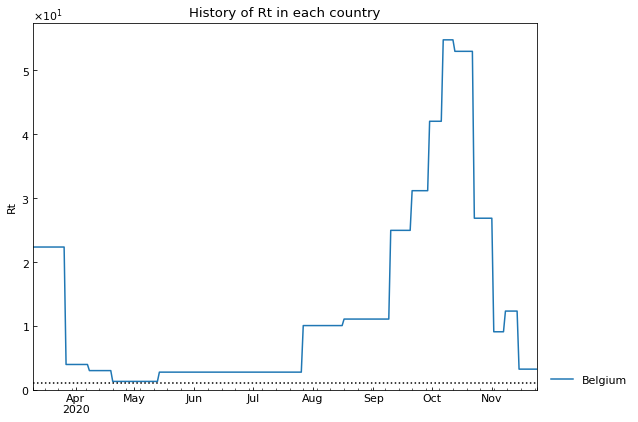

Country,Belgium
Date,
2020-11-20,3.22
2020-11-21,3.22
2020-11-22,3.22
2020-11-23,3.22
2020-11-24,3.22


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

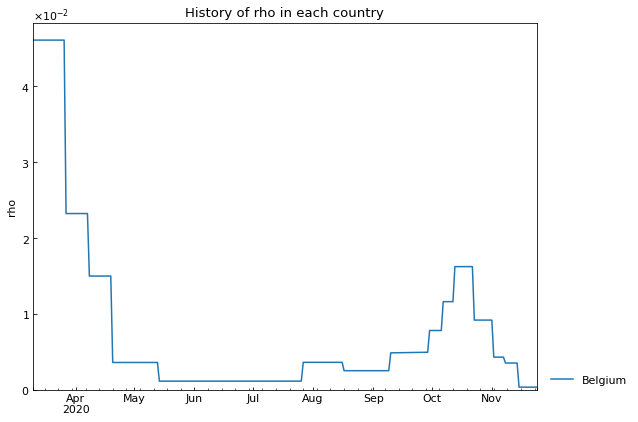

Country,Belgium
Date,
2020-11-20,0.000339
2020-11-21,0.000339
2020-11-22,0.000339
2020-11-23,0.000339
2020-11-24,0.000339


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

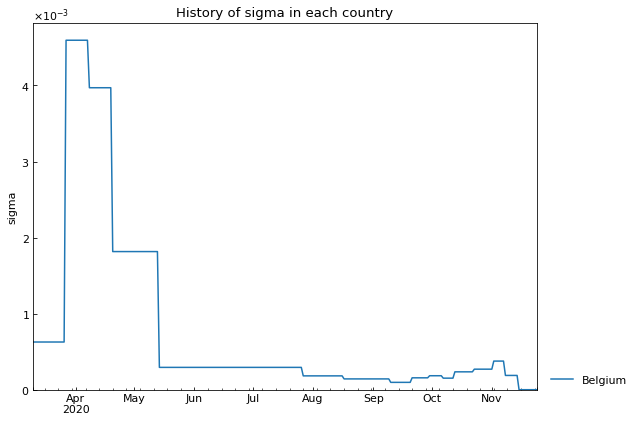

Country,Belgium
Date,
2020-11-20,0.0
2020-11-21,0.0
2020-11-22,0.0
2020-11-23,0.0
2020-11-24,0.0


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

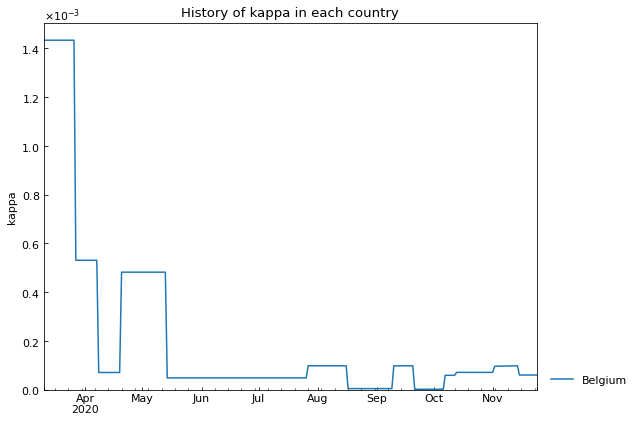

Country,Belgium
Date,
2020-11-20,0.00006
2020-11-21,0.00006
2020-11-22,0.00006
2020-11-23,0.00006
2020-11-24,0.00006


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

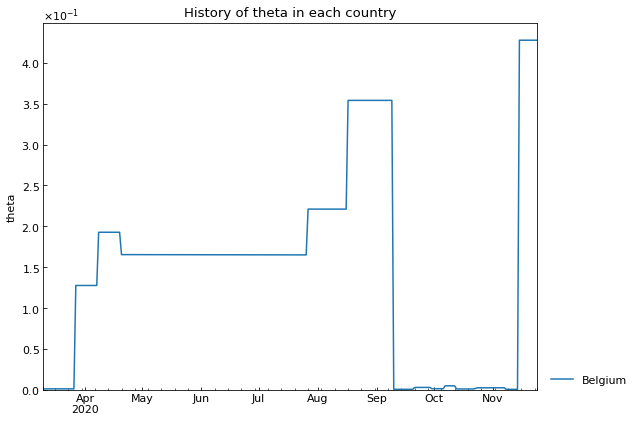

Country,Belgium
Date,
2020-11-20,0.427654
2020-11-21,0.427654
2020-11-22,0.427654
2020-11-23,0.427654
2020-11-24,0.427654


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 1026 non-null   datetime64[ns]
 1   Country                              1026 non-null   object        
 2   Rt                                   1026 non-null   float64       
 3   theta                                1026 non-null   float64       
 4   kappa                                1026 non-null   float64       
 5   rho                                  1026 non-null   float64       
 6   sigma                                1026 non-null   float64       
 7   School_closing                       1026 non-null   int64         
 8   Workplace_closing                    1026 non-null   int64         
 9   Cancel_events                        1026 non-null   int64         
 10  Gatherings_r

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.591530,0.009180,0.335319,-0.292689,-0.489299,-0.318865,-0.705579,0.053716,nan,-0.185028,-0.147176,-0.276801,nan,0.187709,0.284551,-0.509843
theta,-0.591530,1.000000,-0.281130,-0.427497,0.005975,0.043947,0.167267,0.495295,0.143830,nan,0.168524,0.051186,0.175791,nan,0.103566,0.045234,0.208535
kappa,0.009180,-0.281130,1.000000,0.844941,0.293937,0.196459,0.117496,-0.028039,-0.500902,nan,-0.213383,0.014202,-0.256187,nan,-0.702894,-0.582319,0.140664
rho,0.335319,-0.427497,0.844941,1.000000,0.361624,0.036823,0.003116,-0.282317,-0.435273,nan,-0.243603,-0.029943,-0.272943,nan,-0.646286,-0.450529,-0.023629
sigma,-0.292689,0.005975,0.293937,0.361624,1.000000,0.494639,0.572221,0.162758,0.121067,nan,0.147527,0.195226,0.591078,nan,-0.780123,-0.759124,0.622558
School_closing,-0.489299,0.043947,0.196459,0.036823,0.494639,1.000000,0.488764,0.397099,0.119830,nan,0.197221,0.246267,0.402346,nan,-0.425397,-0.608315,0.723379
Workplace_closing,-0.318865,0.167267,0.117496,0.003116,0.572221,0.488764,1.000000,0.360865,0.487698,nan,0.345211,0.249537,0.636129,nan,-0.451526,-0.593518,0.772910
Cancel_events,-0.705579,0.495295,-0.028039,-0.282317,0.162758,0.397099,0.360865,1.000000,0.058025,nan,0.122588,0.178542,0.228713,nan,-0.106354,-0.216278,0.452329
Gatherings_restrictions,0.053716,0.143830,-0.500902,-0.435273,0.121067,0.119830,0.487698,0.058025,1.000000,nan,0.499557,0.198323,0.642987,nan,0.175175,-0.015711,0.519319
Transport_closing,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


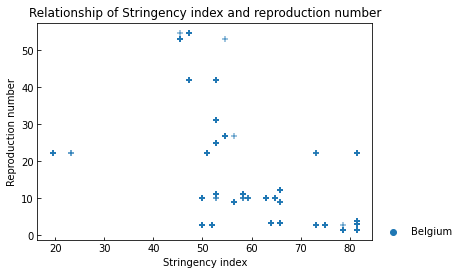

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()